# Import packages & functions

In [1]:
%reset 
%cd /Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
from functools import reduce
from StructuralAnalysisTools.mdPLOTtools import read_xvg

Nothing done.
/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub


# Read & Plot

## CLASS

In [2]:
class RMSF_read_plot:
    def __init__(self, wkdir_list, variants_name, colorlist, focus_on, pdbcode):
        x_list, y_list, header_list = [], [], []
        for wkdir in wkdir_list:
            x, y, header, _, _ = read_xvg(wkdir, f'rmsf_{focus_on}.xvg')
            x_list.append(x)
            y_list.append(y)
            header_list.append(header)

        dfs = []
        for variant, x,y in zip(variants_name, x_list, y_list):
            df = pd.DataFrame({
                "Pos":x,
                f"{pdbcode}_{variant}":y
                })
            dfs.append(df)

        newdf = reduce(lambda left,right: pd.merge(left,right,on='Pos', how='outer').fillna(0), dfs)
        newdf.index = [f"RMSF_{focus_on}_pos{i}" for i in newdf['Pos'].astype(int)]
        newdf.drop('Pos', axis = 1, inplace = True)

        self.data = newdf.copy()
        self.x_list = x_list
        self.y_list = y_list
        self.header_list = header_list
        self.variants_name = variants_name
        self.focus_on = focus_on
        self.colorlist = colorlist

    def quickplot(self):
        fig = plt.figure(figsize=[14,8])
        ax1 = fig.add_subplot(111)
        ax1.set_title(f"RMSF - {self.focus_on}")    
        ax1.set_xlabel('Residue')
        ax1.set_ylabel('RMSF (nm)')
        ax1.ticklabel_format(axis="y")
        for index, (eachname, eachcolor) in enumerate(zip(self.variants_name, self.colorlist)):
            ax1.plot(self.x_list[index], self.y_list[index], label=eachname, color = eachcolor)
        leg = ax1.legend()
        plt.show()  
        


## S1RBD

In [3]:
S1RBD = {}
variants_name = ['WT', 'alpha', 'beta', 'gamma', 'delta', 
                 'deltaplus', 'epsilon', 'lambda', 'mu-R346K', 'mu', 
                 'omicron_BA.1', 'omicron_BA.2', 'omicron_BA.2.12.1', 'omicron_BA.4_5']
colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
             '#bdbdbd', '#af77b4', '#bf7f0e', '#cca02c', '#f62728',
             '#fdfdfd', '#bf77b4', '#cf7f0e', '#dca02c', '#a62728', '#b54e77']

# parameters : 7a91
pdbcode = '7a91'
focus_on = "S1RBD"
gmx_results_folderpath = f'Data/rawdata/md_results/variants_{pdbcode}'
wkdir_list = [f'{gmx_results_folderpath}/{eachname}' for eachname in variants_name]
##########

S1RBD[pdbcode] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, pdbcode)

# parameters : 6m0j
pdbcode = '6m0j'
focus_on = "S1RBD"
gmx_results_folderpath = f'Data/rawdata/md_results/variants_{pdbcode}'
wkdir_list = [f'{gmx_results_folderpath}/{eachname}' for eachname in variants_name]
##########

S1RBD[pdbcode] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, pdbcode)

# parameters : 7mjn, 7v80, 7v84, 7v8b (ground truth)
pdbcodes = ['7mjn', '7v80', '7v84', '7v8b']
focus_on = "S1RBD"
gmx_results_folderpath = [f'Data/rawdata/md_results/variants_{pdbcode}' for pdbcode in pdbcodes]
variants_name = ['alpha', 'beta', 'gamma', 'delta']
colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
wkdir_list = [f'{eachpath}/{eachname}' for eachname, eachpath in zip(variants_name, gmx_results_folderpath)]
##########

S1RBD['groundtruth'] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, 'groundtruth')



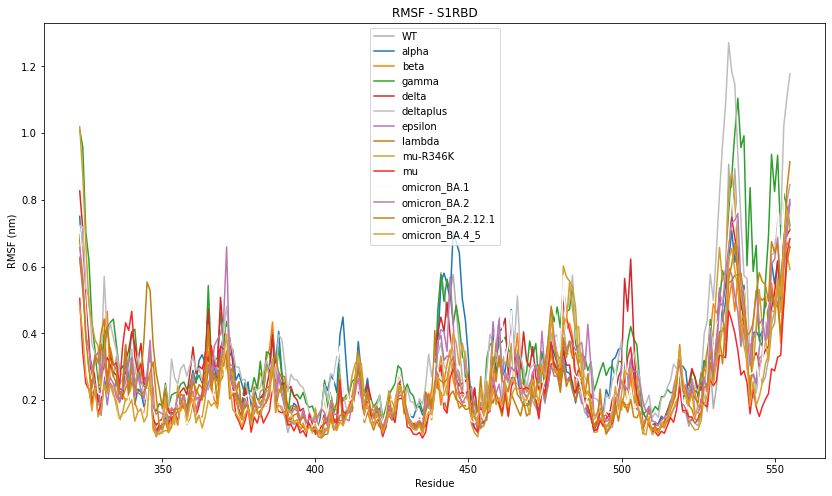

In [4]:
S1RBD['7a91'].quickplot()

In [5]:
df = S1RBD['6m0j'].data
df.head()

,6m0j_WT,6m0j_alpha,6m0j_beta,6m0j_gamma,6m0j_delta,6m0j_deltaplus,6m0j_epsilon,6m0j_lambda,6m0j_mu-R346K,6m0j_mu,6m0j_omicron_BA.1,6m0j_omicron_BA.2,6m0j_omicron_BA.2.12.1,6m0j_omicron_BA.4_5
RMSF_S1RBD_pos333,0.3496,0.3766,0.5624,0.4498,0.3378,0.3874,0.3930,0.5829,0.4628,0.4303,0.3710,0.7876,0.5118,0.4108
RMSF_S1RBD_pos334,0.3082,0.2494,0.4236,0.3500,0.2345,0.3323,0.3140,0.3750,0.4980,0.4292,0.2599,0.7023,0.4068,0.2954
RMSF_S1RBD_pos335,0.2855,0.2028,0.3395,0.2550,0.1934,0.3430,0.3333,0.4554,0.3897,0.3035,0.1913,0.5423,0.3912,0.2373
RMSF_S1RBD_pos336,0.1884,0.1455,0.2092,0.1547,0.1229,0.2388,0.2240,0.2037,0.2742,0.1647,0.1658,0.3372,0.2848,0.1403
RMSF_S1RBD_pos337,0.2041,0.1917,0.2040,0.1430,0.1872,0.2090,0.2206,0.2832,0.2561,0.1932,0.1826,0.3309,0.3552,0.1940


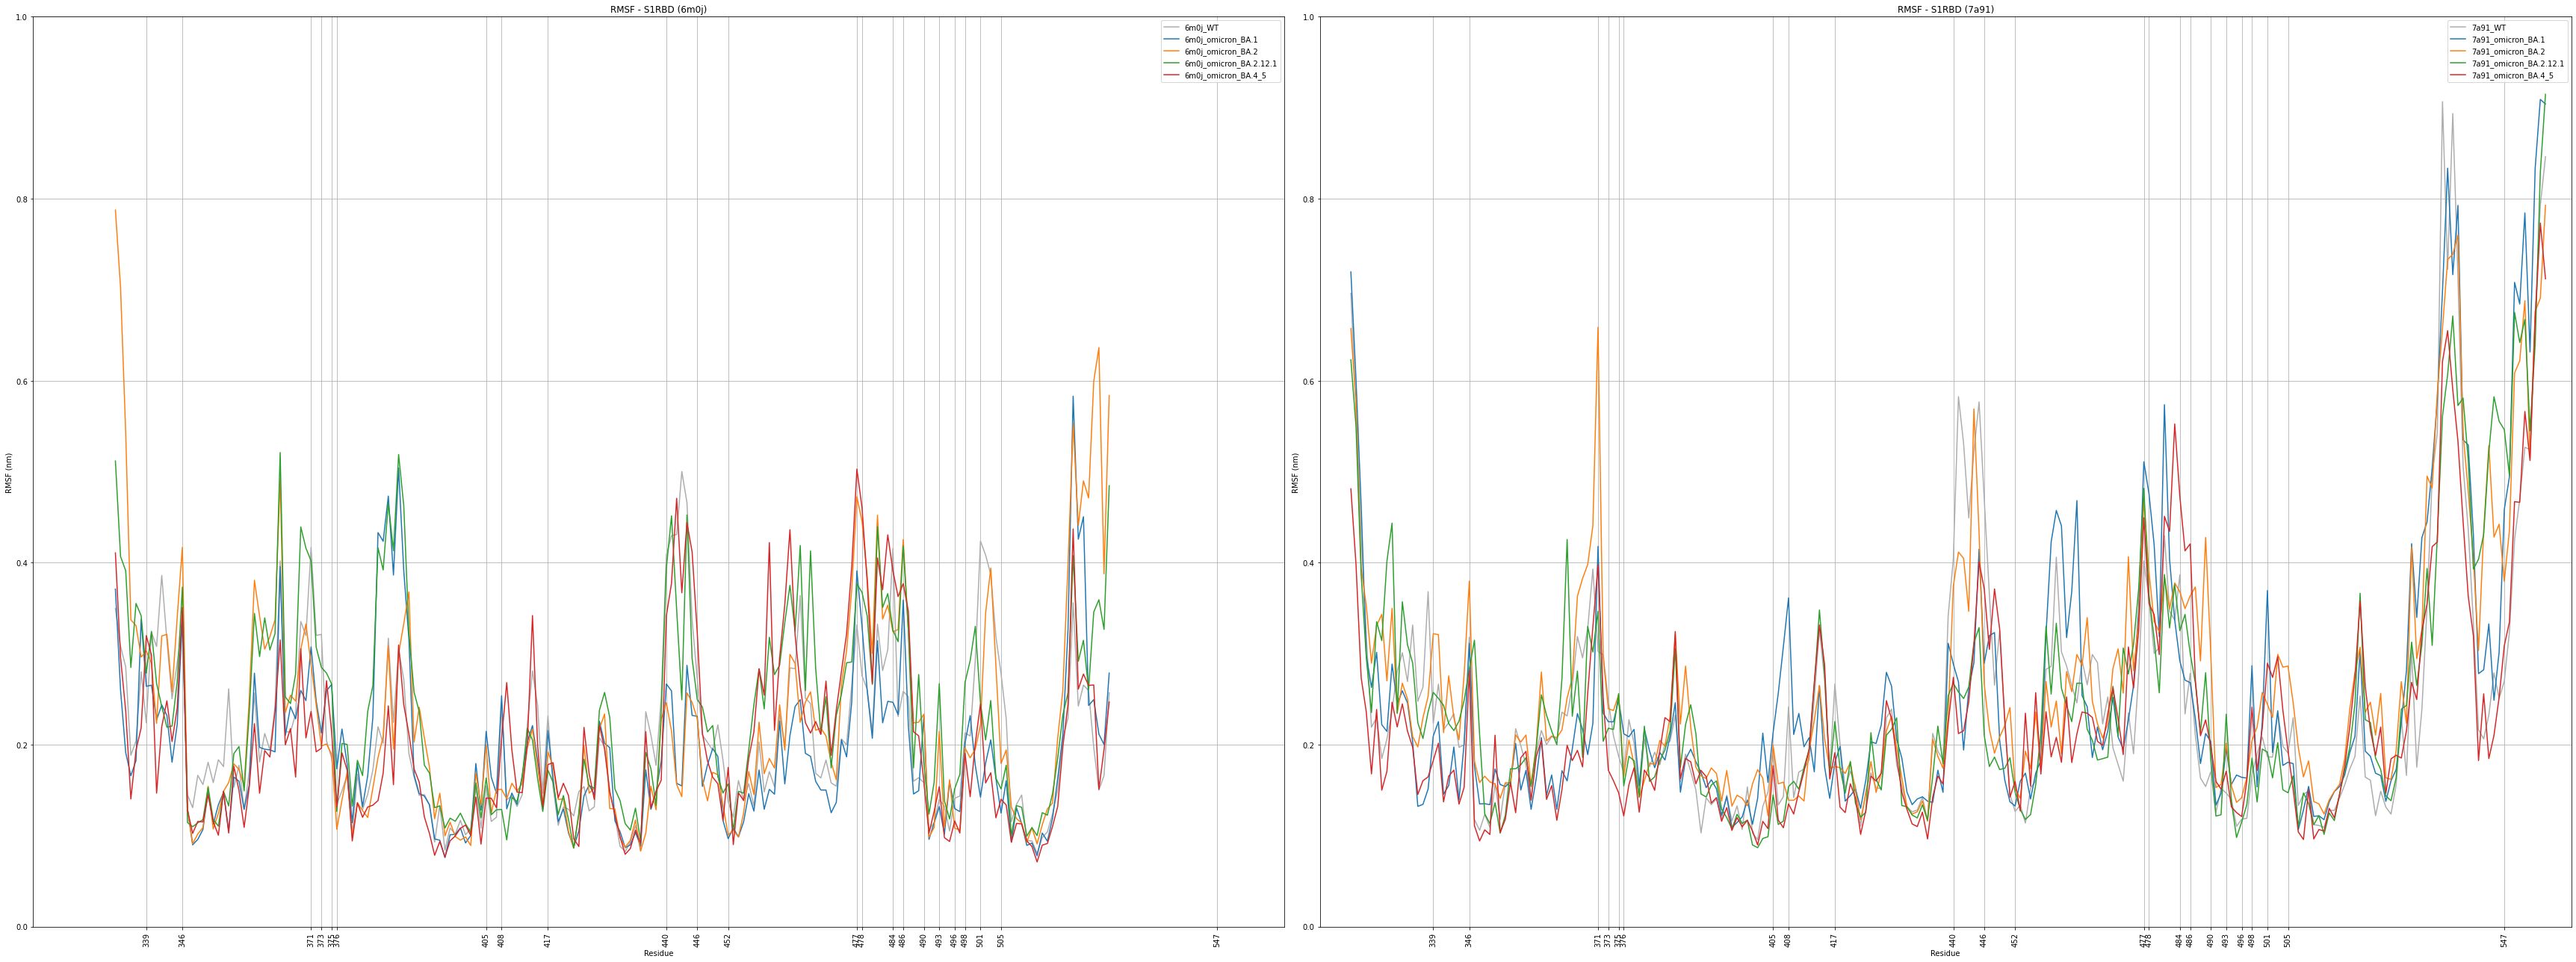

In [73]:
df_omicron_6m0j = S1RBD['6m0j'].data.filter(regex="WT|omicron")
df_omicron_7a91 = S1RBD['7a91'].data.filter(regex="WT|omicron")

fig, axes = plt.subplots(1,2, figsize=[48,18])
colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for jdx, (data, pdbcode) in enumerate(zip([df_omicron_6m0j, df_omicron_7a91], ["6m0j", "7a91"])):
    residue = [int(each.replace("RMSF_S1RBD_pos", "")) for each in data.index]
    variants_name = data.columns
    
    for eachname, eachcolor in zip(variants_name, colorlist):
        axes[jdx].plot(residue, data[eachname], label=eachname, color = eachcolor)
    
    axes[jdx].set_title(f"RMSF - S1RBD ({pdbcode})")    
    axes[jdx].set_xlabel('Residue')
    axes[jdx].set_xlim([317,560])
    axes[jdx].set_ylabel('RMSF (nm)')
    axes[jdx].set_ylim([0,1])
    axes[jdx].ticklabel_format(axis="y")
    axes[jdx].set_xticks(
        [339, 346, 371, 373, 375, 376, 405, 408, 417, 440, 446, 452, 477, 478, 484, 486, 490, 493, 496, 498, 501, 505, 547]
    )
    axes[jdx].set_xticklabels(
        [339, 346, 371, 373, 375, 376, 405, 408, 417, 440, 446, 452, 477, 478, 484, 486, 490, 493, 496, 498, 501, 505, 547],
        rotation = 90
    )
    axes[jdx].legend()
    axes[jdx].grid()
plt.tight_layout()
plt.show() 

## hACE2

In [6]:
hACE2 = {}
focus_on = "hACE2"
variants_name = ['WT', 'alpha', 'beta', 'gamma', 'delta', 
                 'deltaplus', 'epsilon', 'lambda', 'mu-R346K', 'mu', 
                 'omicron_BA.1', 'omicron_BA.2', 'omicron_BA.2.12.1', 'omicron_BA.4_5']
colorlist = ['#adadad', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
             '#bdbdbd', '#af77b4', '#bf7f0e', '#cca02c', '#f62728',
             '#fdfdfd', '#bf77b4', '#cf7f0e', '#dca02c', '#a62728', '#b54e77']

# parameters : 7a91
pdbcode = '7a91'
gmx_results_folderpath = f'Data/rawdata/md_results/variants_{pdbcode}'
wkdir_list = [f'{gmx_results_folderpath}/{eachname}' for eachname in variants_name]
##########

hACE2[pdbcode] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, pdbcode)

# parameters : 6m0j
pdbcode = '6m0j'
gmx_results_folderpath = f'Data/rawdata/md_results/variants_{pdbcode}'
wkdir_list = [f'{gmx_results_folderpath}/{eachname}' for eachname in variants_name]
##########

hACE2[pdbcode] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, pdbcode)

# parameters : 7mjn, 7v80, 7v84, 7v8b (ground truth)
pdbcodes = ['7mjn', '7v80', '7v84', '7v8b']
gmx_results_folderpath = [f'Data/rawdata/md_results/variants_{pdbcode}' for pdbcode in pdbcodes]
variants_name = ['alpha', 'beta', 'gamma', 'delta']
colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
wkdir_list = [f'{eachpath}/{eachname}' for eachname, eachpath in zip(variants_name, gmx_results_folderpath)]
##########

hACE2['groundtruth'] = RMSF_read_plot(wkdir_list, variants_name, colorlist, focus_on, 'groundtruth')

## merge to df

In [7]:
for eachkey in ['6m0j', '7a91', 'groundtruth']:
    if eachkey == '6m0j':
        df = S1RBD[eachkey].data.T
        df.reset_index(inplace=True)
        df1 = hACE2[eachkey].data.T
        df1.reset_index(inplace=True)
    else:
        temp_df = S1RBD[eachkey].data.T
        temp_df.reset_index(inplace=True)
        df = pd.merge(df, temp_df, how = 'outer')
        temp_df1 = hACE2[eachkey].data.T
        temp_df1.reset_index(inplace=True)
        df1 = pd.merge(df1, temp_df1, how = 'outer')

df.sort_index(axis = 1, inplace = True)
df = pd.merge(df, df1, how = 'outer', on = 'index')
df.index = df['index']
df.drop(columns = 'index', inplace = True)
df.head()

,RMSF_S1RBD_pos323,RMSF_S1RBD_pos324,RMSF_S1RBD_pos325,RMSF_S1RBD_pos326,RMSF_S1RBD_pos327,RMSF_S1RBD_pos328,RMSF_S1RBD_pos329,RMSF_S1RBD_pos330,RMSF_S1RBD_pos331,RMSF_S1RBD_pos332,...,RMSF_hACE2_pos606,RMSF_hACE2_pos607,RMSF_hACE2_pos608,RMSF_hACE2_pos609,RMSF_hACE2_pos610,RMSF_hACE2_pos611,RMSF_hACE2_pos612,RMSF_hACE2_pos613,RMSF_hACE2_pos614,RMSF_hACE2_pos615
index,,,,,,,,,,,,,,,,,,,,,
6m0j_WT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1009,0.1306,0.1412,0.2469,0.1431,0.1686,0.1711,0.5003,0.5072,0.7665
6m0j_alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1326,0.1317,0.1255,0.2211,0.1308,0.1779,0.1648,0.5153,0.5401,0.7203
6m0j_beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1407,0.1553,0.1852,0.2551,0.2111,0.2170,0.2214,0.3599,0.3423,0.5128
6m0j_gamma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0888,0.1137,0.1202,0.2011,0.1268,0.1540,0.1482,0.2453,0.3086,0.4995
6m0j_delta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1134,0.1295,0.1429,0.2557,0.2389,0.2293,0.2202,0.4360,0.4511,0.6266


## save df.csv

In [8]:
df.to_csv(f'Data/metadata/md_tidydata/RMSF.csv', header = True)

# HeatMap

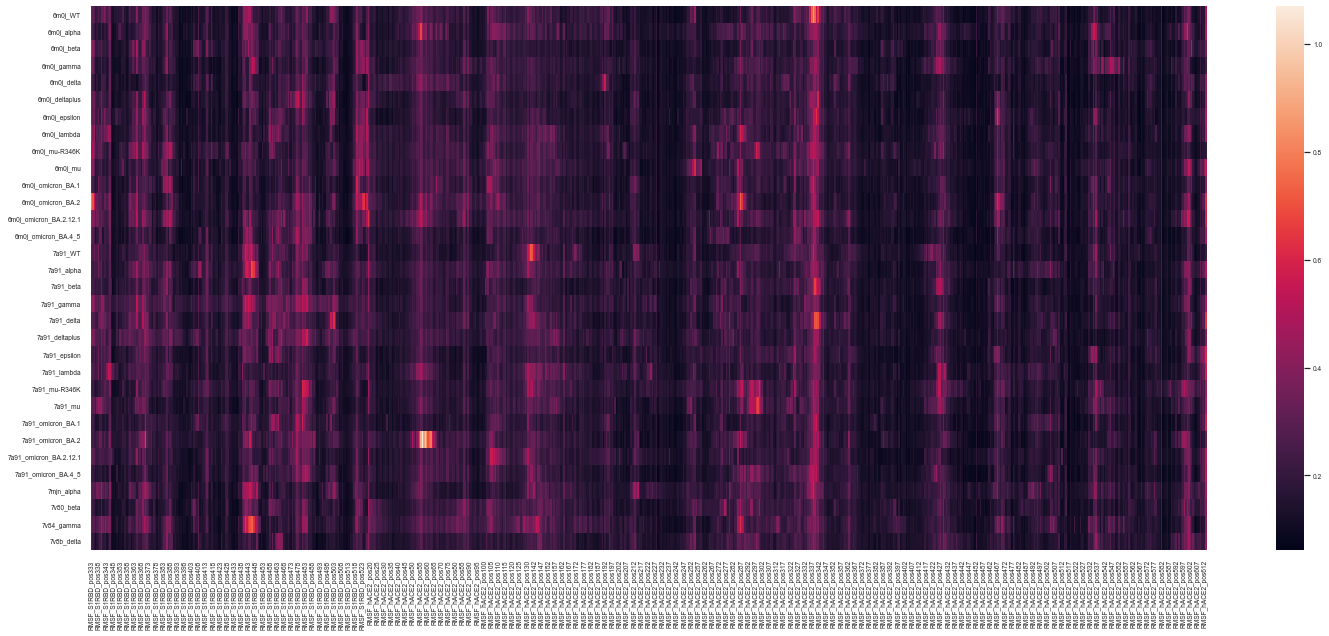

In [12]:
import seaborn as sns

######## parameters #########
# Save path/name
do_auto_save = False
plot_name = 'heatmap_woMUT_70_L.png'
Save_plot_path = '/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj/###'
# Others setting
do_filterMut = False  # only available at S1RBD
do_dropNA = True
filter0value_parameter = 70
df_plot = df.T
##############################

# Filter out mutation sites and create new dataframe
df_plot_index_list = list(df_plot.index)
df_plot_drop_list = []
if do_filterMut:
    for index in df_plot_index_list:
        m = re.search('\w+(417|452|478|484|490|501)$', index)
        if not m == None:
            df_plot_drop_list.append(m.group(0))
df_plot_wo_mut = df_plot.drop(df_plot_drop_list).T # Create data without mutation sites 

# Rename index
df_plot_wo_mut.index = ['6m0j_WT', '6m0j_alpha', '6m0j_beta', '6m0j_gamma', '6m0j_delta',
                        '6m0j_deltaplus', '6m0j_epsilon', '6m0j_lambda', '6m0j_mu-R346K', '6m0j_mu', 
                        '6m0j_omicron_BA.1', '6m0j_omicron_BA.2', '6m0j_omicron_BA.2.12.1', '6m0j_omicron_BA.4_5',
                        '7a91_WT','7a91_alpha', '7a91_beta', '7a91_gamma', '7a91_delta', 
                        '7a91_deltaplus', '7a91_epsilon', '7a91_lambda', '7a91_mu-R346K', '7a91_mu', 
                        '7a91_omicron_BA.1', '7a91_omicron_BA.2', '7a91_omicron_BA.2.12.1', '7a91_omicron_BA.4_5',
                        '7mjn_alpha', '7v80_beta', '7v84_gamma', '7v8b_delta']

# Drop NA
if do_dropNA:
    df_plot_wo_mut.dropna(axis=1, how='any', inplace=True)


# Heatmap plotting
%matplotlib inline
sns.set(font_scale=0.6)
sns.set_context({"figure.figsize":(25, 10)})
myheatmap = sns.heatmap(data=df_plot_wo_mut, square=False)
# myheatmap.invert_yaxis()
if do_auto_save:
    myheatmap.get_figure().savefig(f"{Save_plot_path}/{plot_name}")